# Pandas CheatSheet 快查表

In [1]:
import pandas as pd

# DataFrame
- 就是一个SQL的表格Table

张量：二维矩阵即为二维张量
一张RGB图是张量

一个DataFrame 可以被表示成一个json, 也可以被表示成csv
可以被json所初始化

In [2]:
data = {
    'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
    'year': [2017, 2017, 2017, 2017,2017],
    'salary': [40000, 24000, 31000, 20000, 30000],
    'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
}

In [3]:
d = pd.DataFrame(data)

In [4]:
d

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
3,David,2017,20000,{'a': 4}
4,Eric,2017,30000,{'a': 5}


In [5]:
# 访问数据
d['name']

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [6]:
d.name

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [7]:
# 每一列是Series,相当于数组？
type(d.pair)

pandas.core.series.Series

In [8]:
d.pair.tolist()

[{'a': 1}, {'a': 2}, {'a': 3}, {'a': 4}, {'a': 5}]

In [9]:
d.pair[0]

{'a': 1}

## 薪水大于20000的人都有谁？

In [10]:
d.query('salary>20000')

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [11]:
d[d.salary>20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [12]:
d.salary>20000  # 符合的为True

0     True
1     True
2     True
3    False
4     True
Name: salary, dtype: bool

## Eric 的信息是什么？

In [13]:
d.query('name=="Eric"')

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [14]:
d[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


In [15]:
d.loc[d.name=='Eric']

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


## 联合查找：名叫Bob且薪水大于20000?

In [16]:
d.query("name=='Bob' and salary>20000")

,name,year,salary,pair
1,Bob,2017,24000,{'a': 2}


# 列操作
d.filter

在SQL中常使用的SELECT name,year,salary from T where salary>20000 and name=='Eric'事实上是对二阶张量的行和列进行操作

In [17]:
d.filter(items=['name', 'year', 'salary'])

,name,year,salary
0,Alice,2017,40000
1,Bob,2017,24000
2,Charles,2017,31000
3,David,2017,20000
4,Eric,2017,30000


In [18]:
d[['name', 'year']]  # 简化方法删选列

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


## 模糊查找

In [19]:
d.filter(like='2', axis=0) # 模糊查找行

,name,year,salary,pair
2,Charles,2017,31000,{'a': 3}


In [20]:
d.filter(like='ea', axis=1) # 模糊查找列

,year
0,2017
1,2017
2,2017
3,2017
4,2017


## 分组

In [21]:
df1 = pd.DataFrame(
    {"Name": ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"],
     "City": ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]})

In [22]:
df1

,Name,City
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney
5,Mallory,Paris


## 各自城市有多少人

In [23]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


## 统计量分析

In [24]:
# Numerical变量的数据分析
d.describe()

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


## 统计函数

In [25]:
import numpy as np

In [26]:
df2 = pd.DataFrame(
    {'key1':['a', 'a', 'b', 'b', 'a'],
     'key2':['one', 'two', 'one', 'two', 'one'],
     'data1':np.random.randn(5),
     'data2':np.random.randn(5)})

In [27]:
df2

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,0.265117,1.347075
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084


### 基于属性key1类型a和b各自的均值是多少？
均值是指：包括data1与data2，但是不包括key2,因为key2不是连续型数值。

In [28]:
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,0.033944,-0.101931
b,0.068005,-0.523661


### 联合groupby
'a-one'/'a-two'/'b-one'/'b-two'

In [29]:
df2.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.081643 -0.826434
     two   0.265117  1.347075
b    one  -0.770366 -0.636672
     two   0.906375 -0.410651

In [30]:
# 统计各个列的数量
df2.count()

key1     5
key2     5
data1    5
data2    5
dtype: int64

In [31]:
# 聚类后各列的统计
df2.groupby(['key1']).count()

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


In [32]:
# 联合分组后各列统计
df2.groupby(['key1', 'key2']).count()

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

## 排序

In [33]:
df2

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,0.265117,1.347075
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084


In [34]:
df2.data2.sort_values() # 对列进行排序

4   -1.928084
2   -0.636672
3   -0.410651
0    0.275217
1    1.347075
Name: data2, dtype: float64

In [35]:
df2.sort_values(by='key2') # 整张表按照某一列的数值进行排序

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
2,b,one,-0.770366,-0.636672
4,a,one,-1.209011,-1.928084
1,a,two,0.265117,1.347075
3,b,two,0.906375,-0.410651


In [36]:
# 多属性的排序
df2.sort_values(by=['key1', 'data1', 'data2'])

,key1,key2,data1,data2
4,a,one,-1.209011,-1.928084
1,a,two,0.265117,1.347075
0,a,one,1.045725,0.275217
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651


In [37]:
df2.sort_values(by='key2', ascending=False)

,key1,key2,data1,data2
1,a,two,0.265117,1.347075
3,b,two,0.906375,-0.410651
0,a,one,1.045725,0.275217
2,b,one,-0.770366,-0.636672
4,a,one,-1.209011,-1.928084


## 协方差和相关性

## DataFrame的增删改查

#### 1 如何选择某一行

In [40]:
df2.iloc[0]['key1']   # iloc 用行的index取行

'a'

In [41]:
df2.iloc[0].key1

'a'

In [42]:
df2.loc[0]   # 这里[]内部是key，恰巧index与key是相等的

key1            a
key2          one
data1     1.04572
data2    0.275217
Name: 0, dtype: object

In [48]:
df2.groupby(['key1']).count().iloc[0]

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [49]:
df2.groupby(['key1']).count().loc['a']

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [50]:
df2.iloc[0, 0]

'a'

In [51]:
df2.iloc[:, 0]

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [52]:
df2.iloc[:2]   # 前两行

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,0.265117,1.347075


In [53]:
df2.iloc[0:-1]

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,0.265117,1.347075
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651


In [54]:
# 打印前两行后两列
df2.iloc[:2, -2:]

,data1,data2
0,1.045725,0.275217
1,0.265117,1.347075


## 数据的修改
.at[]

In [55]:
df2.at[1,'data1'] = 6

In [56]:
df2

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,6.000000,1.347075
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084


In [57]:
df2.iat[1, 3] = 3
df2

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,6.000000,3.000000
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084


### 增加行
.append()
对于DataFrame，每一行实际上代表着一个对象（向量），对于对象（向量）的表示，使用json。

In [62]:
# append()会返回一个新的词表，对于之前的df2并不会改变
df3 = df2.append({'data1':1.3,'data2':1.4, 'key1':'b', 'key2':'two'}, ignore_index=True)

In [63]:
df3

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,6.000000,3.000000
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084
5,b,two,1.300000,1.400000


In [68]:
df2.loc[5] = ['c', 'three', 2, 1]
df2

,key1,key2,data1,data2
0,a,one,1.045725,0.275217
1,a,two,6.000000,3.000000
2,b,one,-0.770366,-0.636672
3,b,two,0.906375,-0.410651
4,a,one,-1.209011,-1.928084
5,c,three,2.000000,1.000000


### 增加列
.assign()
每一列代表一个哈希表，有顺序，因此可是为一个数组或列表。

In [64]:
df3.assign(key3=[1,2,3,4,5,6])  # 列表长度得刚刚好，过长过短都会报错

,key1,key2,data1,data2,key3
0,a,one,1.045725,0.275217,1
1,a,two,6.000000,3.000000,2
2,b,one,-0.770366,-0.636672,3
3,b,two,0.906375,-0.410651,4
4,a,one,-1.209011,-1.928084,5
5,b,two,1.300000,1.400000,6


In [65]:
df4 = df3.assign(key3=[1,2,3,4,5,6])

In [66]:
df3.loc[:, 'key4'] = [6,5,4,3,2,1]

In [67]:
df3

,key1,key2,data1,data2,key4
0,a,one,1.045725,0.275217,6
1,a,two,6.000000,3.000000,5
2,b,one,-0.770366,-0.636672,4
3,b,two,0.906375,-0.410651,3
4,a,one,-1.209011,-1.928084,2
5,b,two,1.300000,1.400000,1


## DataFrame自带绘图

In [69]:
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 'year': [2012, 2012, 2013, 2014, 2014], 'reports': [4, 24, 31, 2, 3]}

In [70]:
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])

In [71]:
df3  # 地名，记者名称，年份，报道数量

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


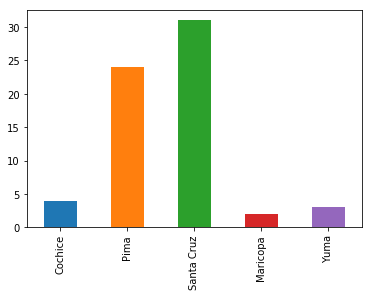

In [78]:
df3['reports'].plot.bar()

In [74]:
# import matplotlib.pyplot as plt

In [75]:
# plt.show()

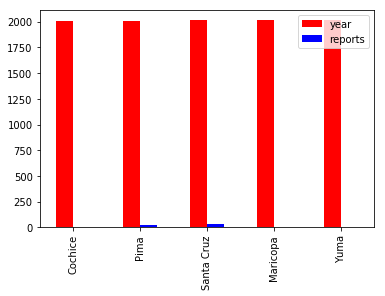

In [81]:
df3.plot.bar(color=['r','b'])  # 只绘数值型的列，离散型的过滤掉了

### 核密度估计（Kernel Density Estimation）

In [82]:
import seaborn as sns

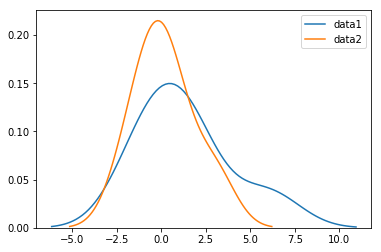

In [86]:
sns.kdeplot(df2['data1'])
sns.kdeplot(df2['data2'])

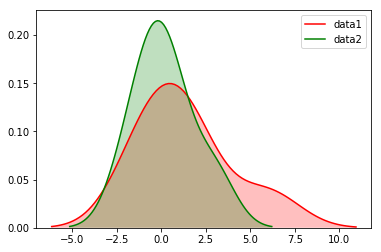

In [87]:
sns.kdeplot(df2['data1'], shade=True, color='r')
sns.kdeplot(df2['data2'], shade=True, color='g')

### 生成一段数据，并进行核密度估计

In [94]:
x=np.random.rand(5000)  # 伪随机会随着样本增大而趋于平均

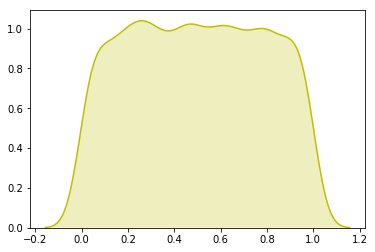

In [95]:
sns.kdeplot(x, shade=True, color='y')